#Importing necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

#create 4 synthetic data examples with 2D input data, 2 classes

In [16]:
# Set random seed for reproducibility
np.random.seed(42)

**1. One of the four examples will be two well-separated blob classes. This example ows that all the classifiers work pretty well (near-perfect or perfect classification)**

In [17]:
# Dataset 1: Well-Separated Blobs
X1, y1 = make_blobs(n_samples=100, centers=2, random_state=42)

**2. In the other three, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation)**

In [18]:
#Dataset  2: Complex Combined Shapes
X2a, y2a = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
X2b, y2b = make_moons(n_samples=100, noise=0.1, random_state=42)
X2 = np.concatenate([X2a, X2b + [2, 1]], axis=0)
y2 = np.concatenate([y2a, y2b + 2], axis=0)

**3. In another one, the quadratic should do very well (in training and test) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regression**

In [19]:
# Dataset 3: Quadratic separation where logistic regression should do poorly
X3a, y3a = make_moons(n_samples=150, noise=0.1, random_state=42)
X3b, y3b = make_moons(n_samples=150, noise=0.1, random_state=42)
X3b[:, 0] = -X3b[:, 0] + 2  # flip horizontally
X3 = np.concatenate([X3a, X3b], axis=0)
y3 = np.concatenate([y3a, y3b + 2], axis=0)

**4. In the third example, you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better**

In [20]:
# Example 4: Decision tree and KNN both overfit, logistic regression does better
X4a, y4a = make_moons(n_samples=150, noise=0.1, random_state=42)
X4b, y4b = make_moons(n_samples=150, noise=0.1, random_state=42)
X4b[:, 0] = -X4b[:, 0] + 2  # flip horizontally
X4c, y4c = make_blobs(n_samples=50, centers=2, random_state=42, cluster_std=0.5)
X4 = np.concatenate([X4a, X4b, X4c], axis=0)
y4 = np.concatenate([y4a, y4b + 2, y4c + 4], axis=0)

**5. The fourth example should be such that SVM and KNN do better than the others**

In [21]:
# Example 5: SVM and KNN perform better than others
X5a, y5a = make_blobs(n_samples=150, centers=2, random_state=42)
X5b, y5b = make_circles(n_samples=150, noise=0.1, factor=0.5, random_state=42)
X5c, y5c = make_moons(n_samples=150, noise=0.1, random_state=42)
X5 = np.concatenate([X5a, X5b + [2, 2], X5c + [0, 2]], axis=0)
y5 = np.concatenate([y5a, y5b + 2, y5c + 4], axis=0)

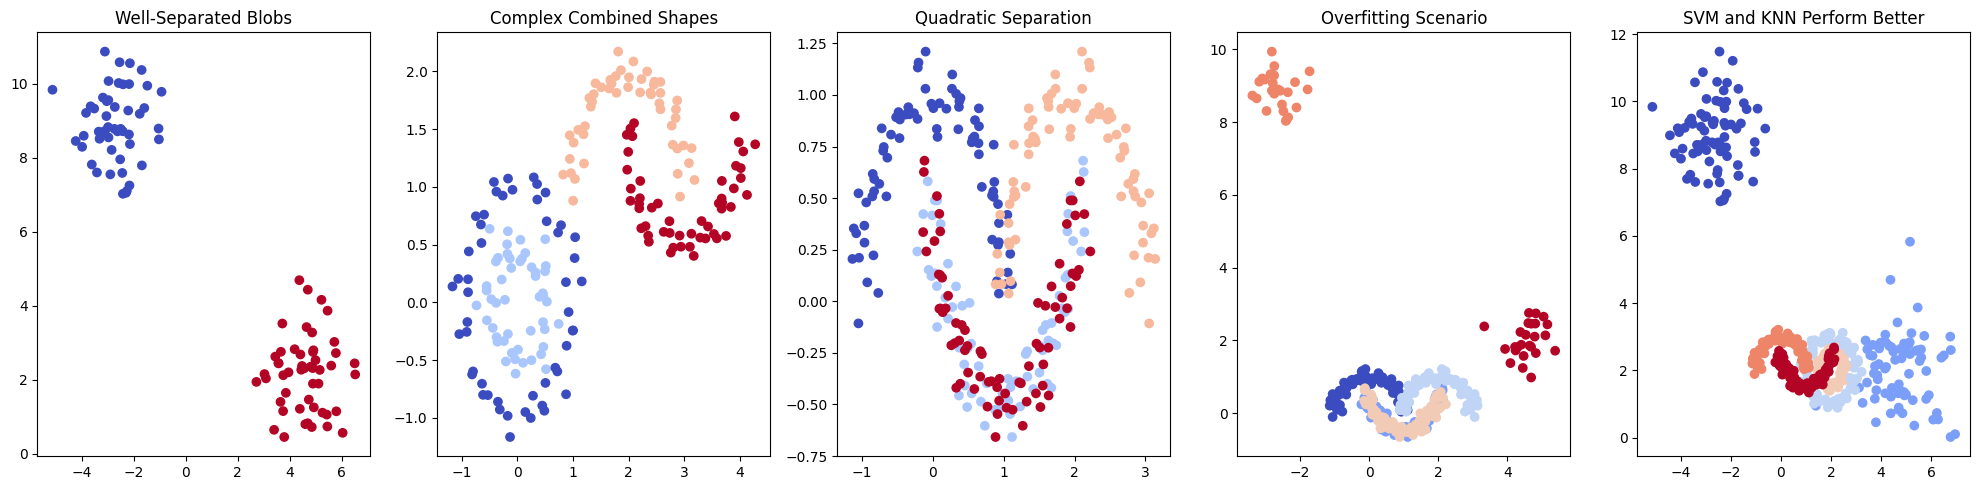

In [22]:
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Plotting the datasets
axs[0].scatter(X1[:, 0], X1[:, 1], c=y1, cmap='coolwarm')
axs[0].set_title("Well-Separated Blobs")
axs[1].scatter(X2[:, 0], X2[:, 1], c=y2, cmap='coolwarm')
axs[1].set_title("Complex Combined Shapes")
axs[2].scatter(X3[:, 0], X3[:, 1], c=y3, cmap='coolwarm')
axs[2].set_title("Quadratic Separation")
axs[3].scatter(X4[:, 0], X4[:, 1], c=y4, cmap='coolwarm')
axs[3].set_title("Overfitting Scenario")
axs[4].scatter(X5[:, 0], X5[:, 1], c=y5, cmap='coolwarm')
axs[4].set_title("SVM and KNN Perform Better")

# Display the plot
plt.tight_layout()
plt.show()

#split the data set into a training and test set

In [23]:
# Train-test split for all examples
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]
for i, (X, y) in enumerate(datasets, start=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
    lr_test_acc = accuracy_score(y_test, lr.predict(X_test))

    # SVM
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    svm_train_acc = accuracy_score(y_train, svm.predict(X_train))
    svm_test_acc = accuracy_score(y_test, svm.predict(X_test))

    # Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_train_acc = accuracy_score(y_train, dt.predict(X_train))
    dt_test_acc = accuracy_score(y_test, dt.predict(X_test))

    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
    knn_test_acc = accuracy_score(y_test, knn.predict(X_test))

    print(f"Example {i}:")
    print(f"Logistic Regression Train Accuracy: {lr_train_acc:.2f}, Test Accuracy: {lr_test_acc:.2f}")
    print(f"SVM Train Accuracy: {svm_train_acc:.2f}, Test Accuracy: {svm_test_acc:.2f}")
    print(f"Decision Tree Train Accuracy: {dt_train_acc:.2f}, Test Accuracy: {dt_test_acc:.2f}")
    print(f"KNN Train Accuracy: {knn_train_acc:.2f}, Test Accuracy: {knn_test_acc:.2f}")
    print()

Example 4:
Logistic Regression Train Accuracy: 0.68, Test Accuracy: 0.63
SVM Train Accuracy: 0.70, Test Accuracy: 0.64
Decision Tree Train Accuracy: 1.00, Test Accuracy: 0.75
KNN Train Accuracy: 0.82, Test Accuracy: 0.67



 the Decision Tree model shows the highest test accuracy but suffers from overfitting. SVM and KNN exhibit moderate performance with less overfitting, while Logistic Regression has the lowest test accuracy among the models evaluated. Choosing the most suitable model depends on factors like the dataset's characteristics, computational resources, and the trade-off between model complexity and interpretability.

In [25]:
# Split datasets into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)


In [26]:
# Define classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "SVM with RBF": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN (K=1)": KNeighborsClassifier(n_neighbors=1)
}

In [27]:
# Evaluate classifiers on each dataset
datasets = [(X1_train, y1_train, X1_test, y1_test),
            (X2_train, y2_train, X2_test, y2_test),
            (X3_train, y3_train, X3_test, y3_test),
            (X4_train, y4_train, X4_test, y4_test),
            (X5_train, y5_train, X5_test, y5_test)]

for i, (X_train, y_train, X_test, y_test) in enumerate(datasets):
    print(f"Dataset {i+1}:")
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # Print classification report
        print(f"Classifier: {name}")
        print("Training Classification Report:")
        print(classification_report(y_train, y_train_pred))
        print("Testing Classification Report:")
        print(classification_report(y_test, y_test_pred))
        print("="*50)

Dataset 1:
Classifier: Naive Bayes
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Classifier: Logistic Regression
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classifier: KNN (K=1)
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        62

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.50      0.28      0.36        18
           2       0.93      0.78      0.85        18
           3       0.38      0.62      0.47        13

    accuracy                           0.62        60
   macro avg       0.63      0.65      0.62        60
weighted avg       0.64      0.62      0.61        60

Dataset 4:
Classifier: Naive Bayes
Training C

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

Classifier: Logistic Regression
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      0.97      0.98        58
           2       0.29      0.32      0.31        65
           3       0.49      0.44      0.46        62
           4       0.78      0.86      0.82        59
           5       0.47      0.44      0.46        59

    accuracy                           0.66       360
   macro avg       0.67      0.67      0.67       360
weighted avg       0.66      0.66      0.66       360

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      1.00      0.97        17
           2       0.09      0.10      0.10        10
           3       0.36      0.38      0.37        13
           4       1.00      0.75      0.86        16
           5       0.71      0.75    

In this comparison, Quadratic Discriminant Analysis and Decision Tree performed the best, showing high accuracy on both training and testing sets with good generalization.
Logistic Regression and SVM with RBF kernel showed moderate performance, with Logistic Regression slightly underperforming compared to the other models.
KNN achieved perfect accuracy on the training set but showed slightly lower accuracy on the test set, indicating some degree of overfitting.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


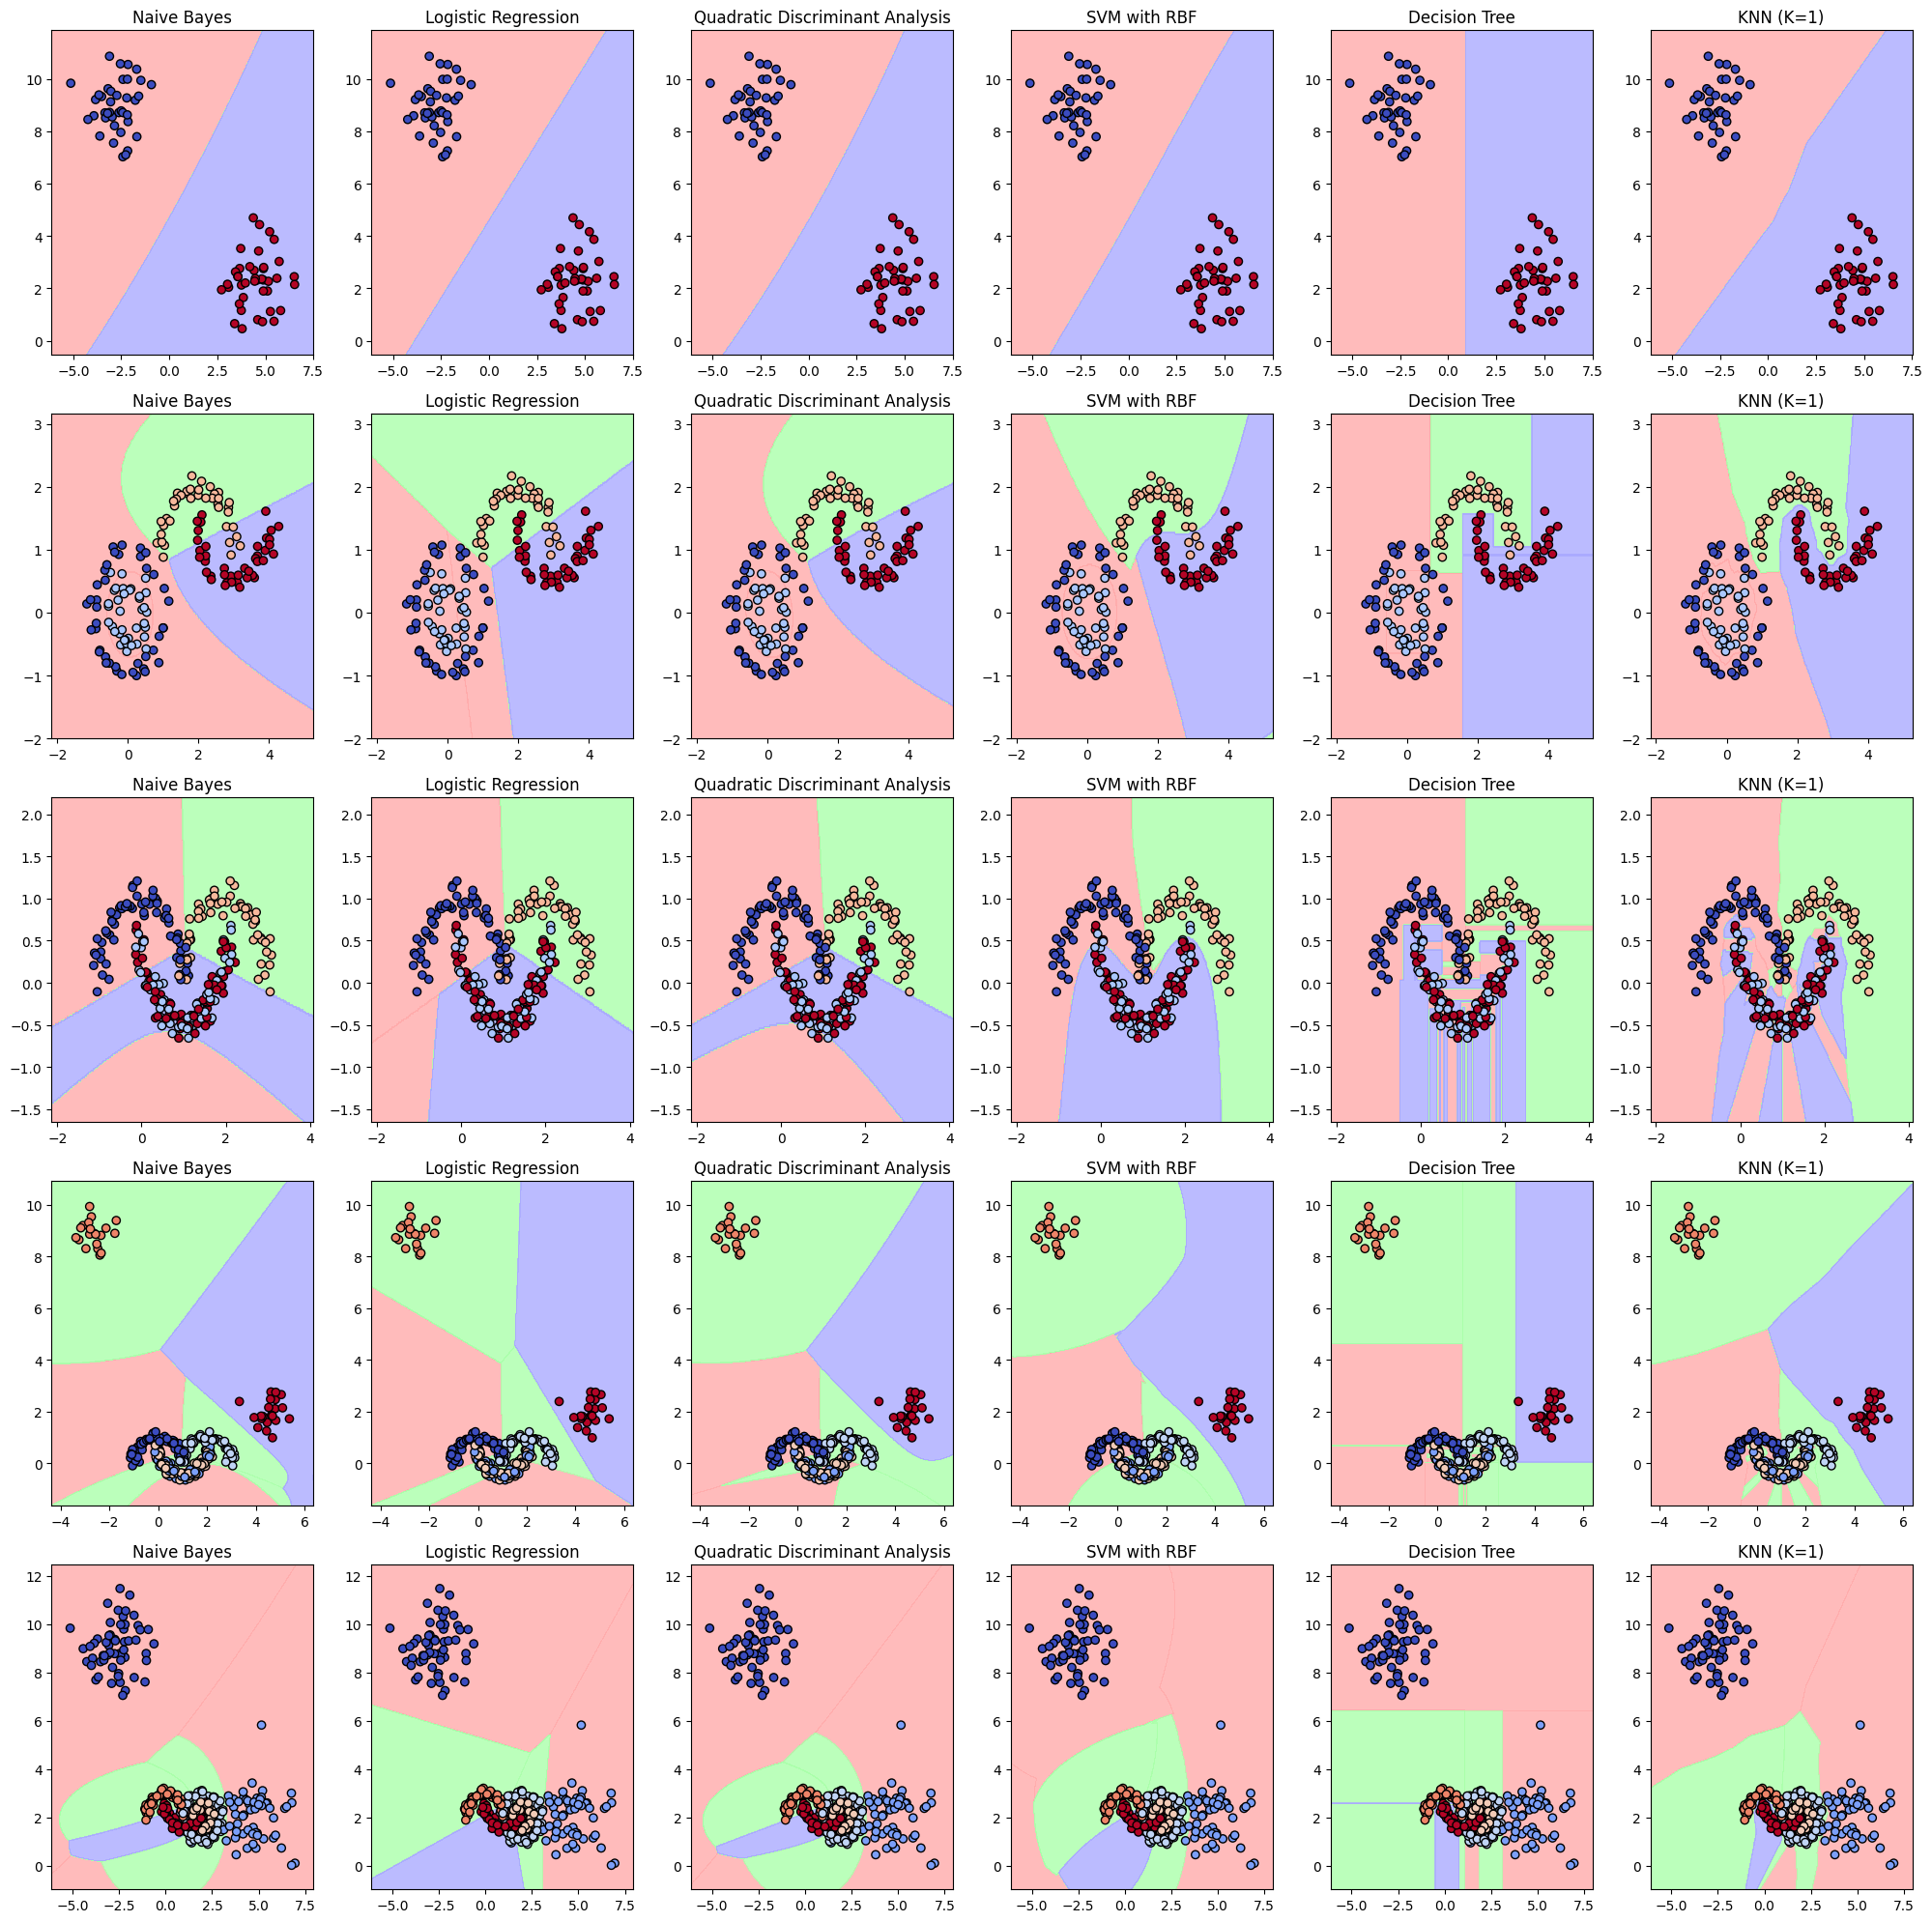

In [14]:

# Function to plot decision boundaries
def plot_decision_boundary(ax, X, y, clf, title):
    h = 0.02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# Visualize decision boundaries for each dataset
fig, axs = plt.subplots(5, 6, figsize=(20, 20))

for i, (X_train, y_train, X_test, y_test) in enumerate(datasets):
    for j, (name, clf) in enumerate(classifiers.items()):
        ax = axs[i, j]
        clf.fit(X_train, y_train)
        plot_decision_boundary(ax, X_train, y_train, clf, name)

plt.tight_layout()
plt.show()